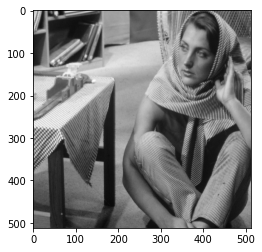

In [1]:
import os 
os.chdir("path/admm-matrix-completion")

from data import load_gif_data
from core.utils import Mask
    
import numpy as np
import matplotlib.pyplot as plt

DATA_DIR = "imgs"
img = load_gif_data(DATA_DIR)[0] / 255

plt.imshow(img, cmap='gray')

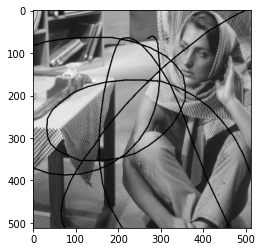

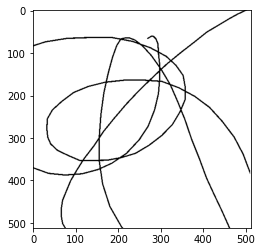

In [2]:
MODE = "irregular"
mask = Mask(mode=MODE, prcnt=0.5)

corrupted , mask =  mask(img)
plt.imshow(corrupted, cmap='gray')
plt.show()

plt.imshow(mask, cmap='gray')
plt.show()

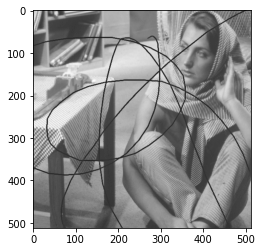

In [3]:
import bm3d

denoised = bm3d.bm3d(corrupted, sigma_psd=np.std(mask), stage_arg=bm3d.BM3DStages.HARD_THRESHOLDING)
plt.imshow(denoised*(1-mask)+ corrupted, cmap='gray')

iteration 29 | error 16.36 | psnr 29.91 | ssim 0.92 | time 8.172391891479492


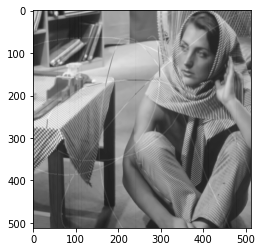

In [4]:
from core.admm import ADMM

admm = ADMM()
estimated = admm.restore(corrupted, mask, sol=img, iters=30)

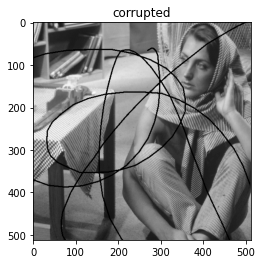

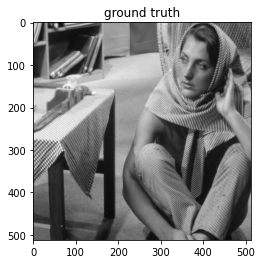

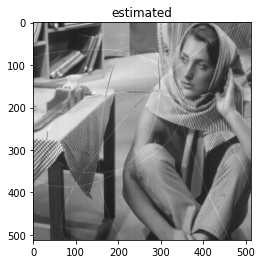

In [5]:
plt.title("corrupted")
plt.imshow(corrupted, cmap='gray')
plt.show()

plt.title("ground truth")
plt.imshow(img, cmap='gray')
plt.show()


plt.title("estimated")
plt.imshow(estimated, cmap='gray')
plt.show()

In [ ]:
# ! pip install bm3d
# ! pip install scikit-image